## Importing relevant packages

In [868]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler



from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline





In [869]:
#Additional code to increase width of Jupyter Notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Reading Data Available, dropping nulls, and dropping unnessary column values
### Looking at the data and determing what categories would be useful for the  prediction of those that took the h1n1 vaccine. In order to do that seasonal vaccine categories were dropped.


In [870]:
dftest =pd.read_csv('test_set_features.csv')

In [871]:
dftrain =pd.read_csv('training_set_features.csv')

In [872]:
Labels= pd.read_csv('training_set_labels (1).csv')


In [873]:
Testdf= dftest1.dropna()
Traindf= dftrain1.dropna()
Labels1= Labels.dropna()
#dropping categories relating to seasonal vaccines
TrainLabels2= TrainLabels.drop(columns=['opinion_seas_risk','opinion_seas_vacc_effective','opinion_seas_sick_from_vacc'])

TrainLabels3= TrainLabels2.drop(columns='doctor_recc_seasonal')

## Splitting data into a X and y values and formation of pipeline


In [874]:
#Isolating the feature that  needs to be predicted. 

X = TrainLabels3.drop('h1n1_vaccine', 1)
y = TrainLabels3['h1n1_vaccine']

X_train, X_test,y_train, y_test = train_test_split(X,y , test_size = .30, random_state = 42)

/var/folders/tl/4k7m4vv922qd25wl53zg2x240000gn/T/ipykernel_95106/2508703583.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = TrainLabels3.drop('h1n1_vaccine', 1)


In [875]:
#Isolating which coumns contains objects and which contain numbers. This is needed to be later one hot encoded. 

nom_cols = X.select_dtypes('object').columns

num_cols = X.select_dtypes('number').columns

In [897]:
numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

#fitting the nomainal categories with OneHotEncoder to make objects in integars 
nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

ct = ColumnTransformer(
    [('ord', nominal_pipeline, nom_cols),
    ('nom', numeric_pipeline, num_cols)])

In [877]:
pipe= pipe.fit(X_train,y_train)

# First Pipeline
## Logistical Regression with bagging

In [907]:
smote = SMOTE(sampling_strategy=0.7, random_state=42)
bag_class_decision = BaggingClassifier(base_estimator=LogisticRegression())
bag_pipe = Pipeline([
    ('preprocess', ct),
    ('smote', smote),
    ('model', LogisticRegression())
])

params = {'model__C': [0.1, 1.0, 10.0]}

cv2 = GridSearchCV(estimator=bag_pipe, param_grid=params, cv=5, error_score='raise')
cv2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ord',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first')),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status'],
      dtype='object')),
                                                                        ('nom',
                                                                         Pipeli...
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1.0, 10.0]})

In [908]:
cv2.score(X_test,y_test)

0.805594800791184

Confusion Matrix:
[[2286  202]
 [ 462  589]]


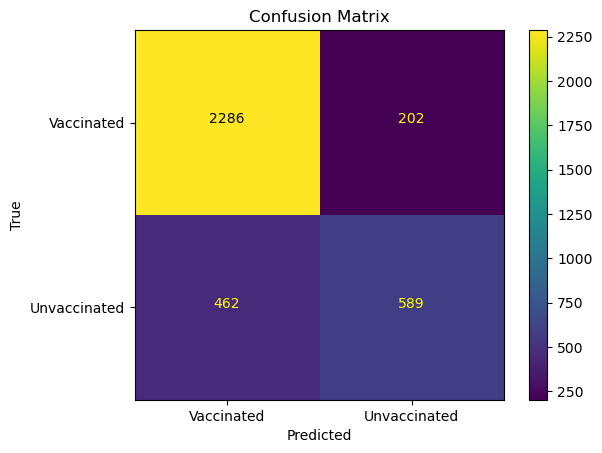

In [909]:
## Logistical Regression Confustion Matrix 


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_bag_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, interpolation='nearest')
thresh = cm.max() / 2  
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "Yellow")
plt.colorbar()
plt.xticks([0, 1], ['Vaccinated', 'Unvaccinated'])
plt.yticks([0, 1], ['Vaccinated', 'Unvaccinated'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### While the True vaccinated number was quite high, so was the number of unvaccinated patients that the modelled incorrectly identified as being vaccinated. 

# Second Pipeline 
## Decision Tree Classifier with bagging

In [879]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE(sampling_strategy=0.8, k_neighbors=4, random_state=42)
bag_class_decision = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=150)

newpipeline = Pipeline([
    ('preprocess', ct),
    ('smote', smote),
    ('model', bag_class_decision)  
])

params = {
    'model__n_estimators': [10, 20, 50, 100, 200],
    'model__estimator__max_features': [5, 10, 20]
}

cv1 = GridSearchCV(estimator=newpipeline, param_grid=params, cv=5, error_score='raise')
cv1.fit(X_train, y_train)






GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first')),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status'],
      dtype=...
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(k_neighbors=4, random_state=42,
                                              sampling_strategy=0.8)),
                                       ('model',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                          n_estimators=150))]),
             param_grid={'model__estimator__max_features': [5, 10, 20],
                         'model__n_estimators': [10, 20, 50, 100, 200]})

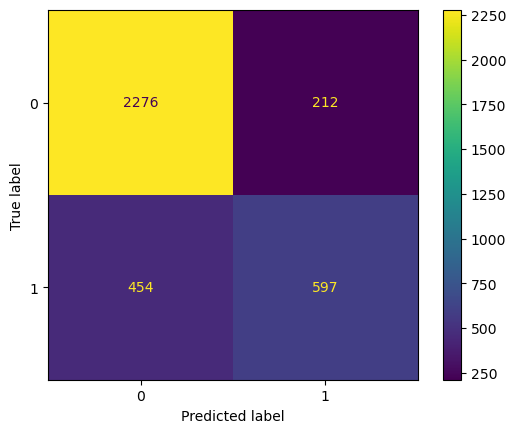

In [919]:
# baggin with dicison tree estimator 
ct = confusion_matrix(y_test, y_bag_pred1)
ConfusionMatrixDisplay(ct).plot()




### While the True vaccinated number was lower than the confusion matrix for the logistical regression pipeline the number of unvaccinated patients that the modelled incorrectly identified as being vaccinated was lower


## Fitting model with ROC curve to test model accuracy and find optimal tradeoff point

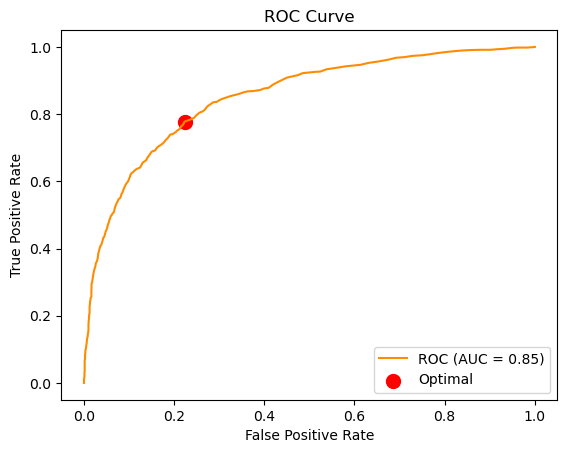

In [886]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_scores = cv1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = auc(fpr, tpr)

# Find the optimal point on the ROC curve
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_index]
optimal_fpr = fpr[optimal_index]
optimal_tpr = tpr[optimal_index]

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC (AUC = %0.2f)' % auc_score)
plt.scatter(optimal_fpr, optimal_tpr, c='r', s=100, label='Optimal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



## Finding which features are the most important in prediciting H1N1 Vaccine status
### Using the Decision Tree with Bagging

In [863]:
cv.fit(X_train, y_train)

best_estimator = cv.best_estimator_


bagging_model = best_estimator.named_steps['model']

if hasattr(bagging_model, 'estimators_'):  
    feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
else:  
    feature_importances = bagging_model.feature_importances_
    

DecisionTreeFeatures = pd.DataFrame(zip(X_train.columns, feature_importances))
DecisionTreeFeatures = X_DecisionTreeFeatures.sort_values(by=1, ascending=False).drop(0, axis=0).reset_index(drop=True)



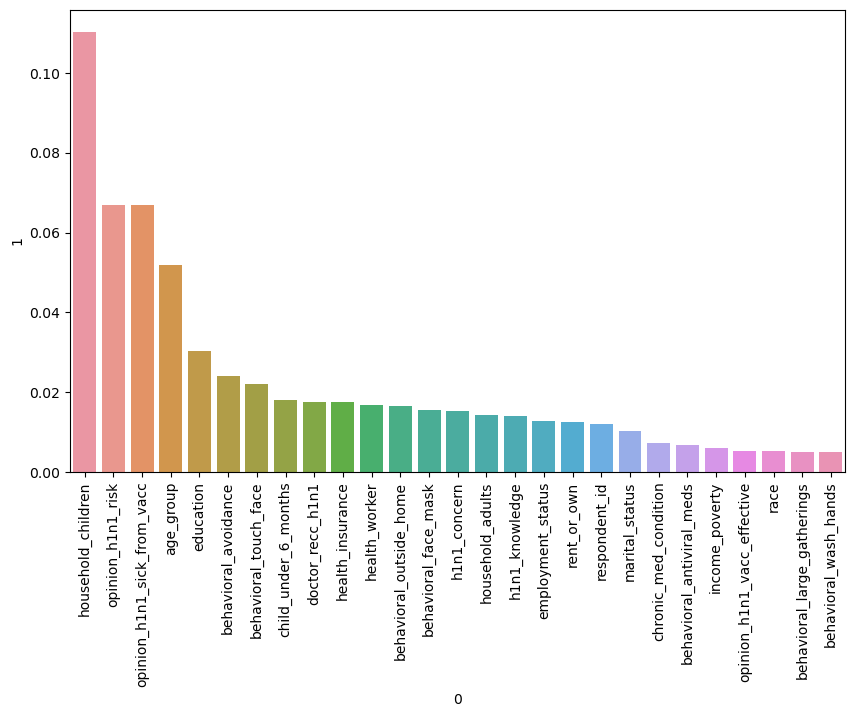

In [809]:
data=  pd.DataFrame(zip(X_train.columns, feature_importances)).sort_values(by =1, ascending = False)

X = DecisionTreeFeatures[0]
Y = DecisionTreeFeatures[1]

fig, ax = plt.subplots(figsize=(10, 6))  
sns.barplot(data=data, x=X, y=Y)
ax.tick_params(axis='x', rotation=90)

plt.show()


## Model Three: Randon Forest Classifier

In [861]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE(sampling_strategy=0.8, k_neighbors=4, random_state=42)
ros = RandomOverSampler()

newpipeline = Pipeline([
    ('preprocess', ct),
    ('smote', smote),
    ('model', RandomForestClassifier())
])

params = {
    'model__n_estimators': [10, 20, 50, 100, 200],
    'model__max_features': [5, 10, 20]
}

cv = GridSearchCV(estimator=newpipeline, param_grid=params, cv=5, error_score='raise')
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first')),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status'],
      dtype=...
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                                       ('smote',
                                        SMOTE(k_neighbors=4, random_state=42,
                                              sampling_strategy=0.8)),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_features': [5, 10, 20],
                         'model__n_estimators': [10, 20, 50, 100, 200]})

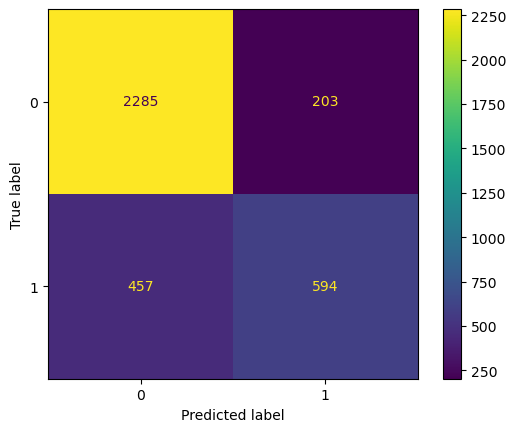

In [806]:
#RandomForest Confusion Matrix 
ct = confusion_matrix(y_test, y_bag_pred2)
ConfusionMatrixDisplay(ct).plot()

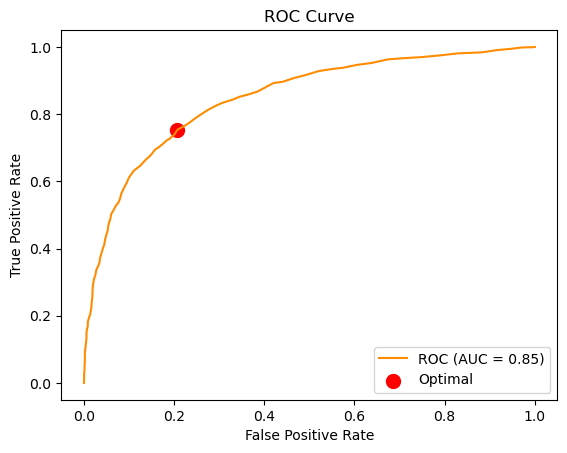

In [887]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_scores = cv.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = auc(fpr, tpr)


#Plotting the optimal tradeoff point on the ROC Curve
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_index]
optimal_fpr = fpr[optimal_index]
optimal_tpr = tpr[optimal_index]

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC (AUC = %0.2f)' % auc_score)
plt.scatter(optimal_fpr, optimal_tpr, c='r', s=100, label='Optimal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Finding which features are the most important in prediciting H1N1 Vaccine status
### Using the Random Forest Classifier

In [811]:
cv.fit(X_train, y_train)

best_estimator = cv.best_estimator_

bagging_model = best_estimator.named_steps['model']

if hasattr(bagging_model, 'estimators_'):  
    feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
else:  
    feature_importances = bagging_model.feature_importances_


    
RandomForestFeatures= pd.DataFrame(zip(X_train.columns, feature_importances))
RandomForestFeatures=RandomForestFeatures.sort_values(by=1, ascending=False).drop(0, axis=0).reset_index(drop=True)



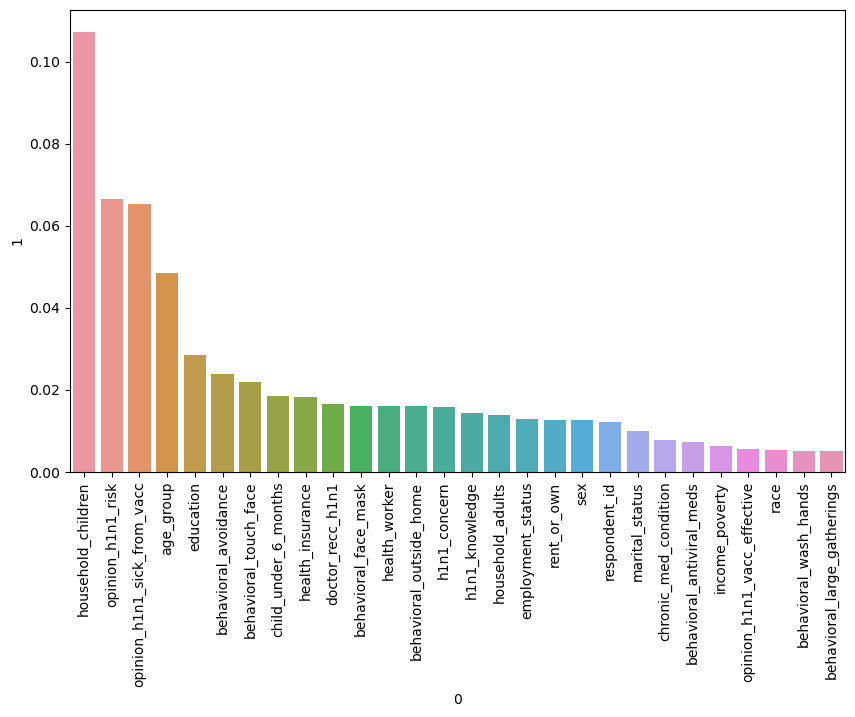

In [812]:
RandomForestFeatures

data1=  pd.DataFrame(zip(X_train.columns, feature_importances)).sort_values(by =1, ascending = False)
X = RandomForestFeatures[0]
Y = RandomForestFeatures[1]

fig, ax = plt.subplots(figsize=(10, 6))  
sns.barplot(data=data, x=X, y=Y)
ax.tick_params(axis='x', rotation=90)

plt.show()

In [914]:
RandomForestFeatures

,0,1
0,household_children,0.107203
1,opinion_h1n1_risk,0.066448
2,opinion_h1n1_sick_from_vacc,0.065249
3,age_group,0.048549
4,education,0.028444
5,behavioral_avoidance,0.023760
6,behavioral_touch_face,0.021816
7,child_under_6_months,0.018603
8,health_insurance,0.018370
9,doctor_recc_h1n1,0.016603


## The best preictive model waas the RandomForest Classifier 
### With exclusion of H1N1 previous knowledge the features with the largest weights are "household_children"and  "age" being the most dominating factors to indicate whether a patient will be vaccinated or not. 

In [837]:
unique_classes, class_counts = np.unique(y, return_counts=True)

minority_class_count = class_counts[unique_classes == 0]
majority_class_count = class_counts[unique_classes == 1]

imbalance_ratio = majority_class_count / minority_class_count

imbalance_ratio

array([0.43252763])